# This part is for dataloader test for improved cycle gan

In [1]:
# Import packages
import time
from options.train_options import TrainOptions
from data import create_dataset
from models import create_model, improved_losses
from util.visualizer import Visualizer
import sys
import os
import torch
import numpy as np
# Import plt
import matplotlib.pyplot as plt



In [2]:
# Simulate command-line arguments
sys.argv = [
    'train.py',  # script name, traditionally argv[0]
    '--dataroot', '/home/frozen/CV_FinalProject/Cell_cycleGAN/Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse',
    '--name', 'cycle_gan',
    '--results_dir', '/home/frozen/Experiments_Repitition/Cell_cycleGAN/results/training_dataset_tiledGOWT_Fakulty_Inverse',
    '--model', 'cycle_gan',
    '--batch_size', '24',
    '--n_epochs', '200',
    '--n_epochs_decay', '200',
    '--continue_train',
    '--epoch_count', '367',
    '--dataset_mode', 'improvedunaligned',
    '--direction', 'AtoB',
]

# Define the options for training
opt = TrainOptions().parse()



----------------- Options ---------------
               batch_size: 24                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /home/frozen/Experiments_Repitition/Cell_cycleGAN/results/training_dataset_tiledGOWT_Fakulty_Inverse/cycle_gan	[default: None]
           continue_train: True                          	[default: False]
                crop_size: 128                           
                 dataroot: /home/frozen/CV_FinalProject/Cell_cycleGAN/Training_Datasets/training_dataset_tiledGOWT_Fakulty_Inverse	[default: None]
             dataset_mode: improvedunaligned             	[default: unaligned]
                direction: AtoB                          	[default: BtoA]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
          

In [3]:
# Create the dataset
dataset = create_dataset(opt)

# Check Length of dataset
print('The length of the dataset is:', len(dataset))


dataset [ImprovedUnalignedDataset] was created
The length of the dataset is: 576


In [4]:
# Get one sample from the dataset
sample = next(iter(dataset)) 


# Display the sample
sample_A = sample['A']
sample_B = sample['B']
sample_A_GT = sample['A_GT']

In [5]:
# Denormalize the image from [0,1] to [0,255]
sample_A = (sample_A + 1)/2 * 255.0
sample_B = (sample_B + 1)/2 * 255.0
sample_A_GT = (sample_A_GT + 1)/2 * 255.0

# Reshape the tensors
sample_A_Vis = sample_A[0].squeeze(0)
sample_B_Vis = sample_B[0].permute(1,2,0)
sample_A_GT_Vis = sample_A_GT[0].permute(1,2,0)

# Convert the tensor to numpy and convert data type to uint8
sample_A_Vis = sample_A_Vis.numpy().astype(np.uint8)
sample_B_Vis = sample_B_Vis.numpy().astype(np.uint8)
sample_A_GT_Vis = sample_A_GT_Vis.numpy().astype(np.uint8)

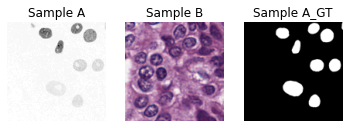

In [6]:
# Display images
plt.figure()
plt.subplot(1, 3, 1)
# Display sample A as grayscale
plt.imshow(sample_A_Vis, cmap='gray')
plt.title('Sample A')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sample_B_Vis)
plt.title('Sample B')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sample_A_GT_Vis)
plt.title('Sample A_GT')
plt.axis('off')

plt.show()


In [7]:
# Test the model - improved_losses

# Test GT loss
print('Testing GT loss')

GT_loss = improved_losses.GT_Loss(sample_A, sample_A_GT)

print('The GT loss is:', GT_loss.item())

Testing GT loss
The GT loss is: 5.63335488550365e-05


In [8]:
# Test ColorVariance loss
print('Testing ColorVariation loss')

# Use sample A and sample B as input
ColorVariance_loss = improved_losses.ColorVariation_Loss(sample_A, sample_B)

print('The ColorVariance loss is:', ColorVariance_loss.item())

Testing ColorVariation loss
The ColorVariance loss is: 0.9911757101191785


In [9]:
# Test HSV loss
print('Testing HSV loss')

# Use sample A and sample B as input
HSV_loss = improved_losses.HSV_Loss(sample_B, sample_B)

print('The HSV loss is:', HSV_loss.item())

Testing HSV loss
The HSV loss is: 1.000393032678403


In [ ]:
# Run the training
